# Exercise 2: Iris - Multiple Linear Regression
* Cho dữ liệu **Iris.xls**
* Yêu cầu: Xây dựng model sử dụng Multiple Linear Regression dựa trên các thuộc tính `sepallength`, `sepalwidth`, `petallength` để dự đoán `petalwidth`, gồm các yêu cầu sau:
  1. Đọc dữ liệu và trực quan hóa.
  2. Tạo `X_train`, `X_test`, `y_train`, `y_test` với input là `sepallength`, `sepalwidth`, `petallength` và output là `petalwidth` với tỉ lệ test data là 0.2.
  3. Áp dụng Multiple Linear Regression.
  4. Vẽ hình, nhận xét kết quả.
  5. Nếu `sepallength`, `sepalwidth`, `petallength` lần lượt là $4.5, 3.1, 1.6$ thì `petalwidth` là bao nhiêu?
  6. Áp dụng lựa chọn thuộc tính quan trọng cho model. Xây dựng lại model sau khi lựa chọn các thuộc tính quan trọng.

###### Task 1
**Đọc dữ liệu**

In [1]:
from modules.reader_writer import readExcel

In [2]:
iris = readExcel('./data/Iris.xls')

iris.head()

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**EDA**

In [3]:
import pandas_profiling as pp

In [4]:
profile = pp.ProfileReport(iris)
profile

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]


In [5]:
from modules.drawer import MySeaborn

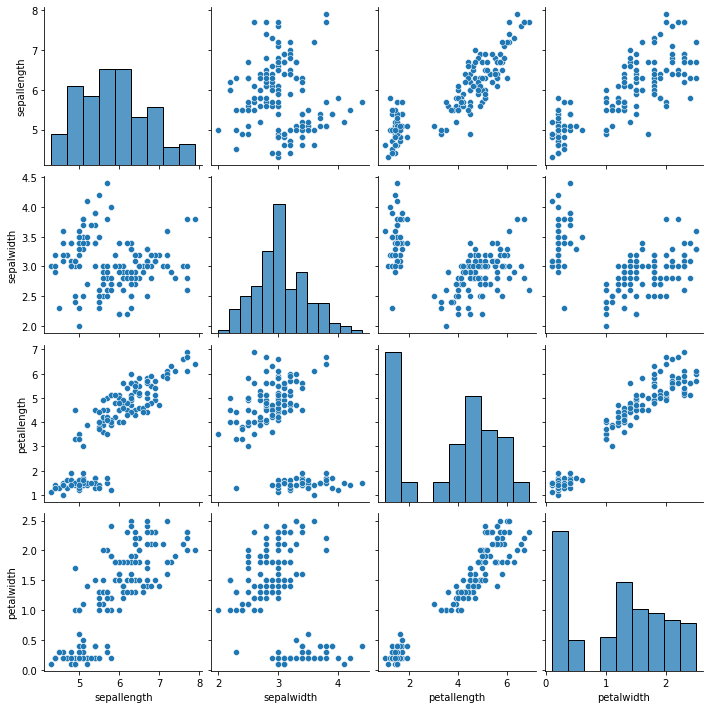

In [6]:
sb = MySeaborn(iris)
sb.pairplot()

> **Nhận xét**
> * `petallength` và `petalwidth` có mối quan hệ tuyến tính mạnh.

###### Task 2

In [7]:
from modules.regression import MyMultipleLinearRegression

In [8]:
mlr = MyMultipleLinearRegression(iris)
mlr.createTrainTestData(['sepallength','sepalwidth', 'petallength'], 'petalwidth', train_size=.8)

###### Task 3
**Build model**

In [9]:
mlr.initModel()

**Áp dụng model để dự đoán dựa trên tập _test data_**

In [10]:
y_predict = mlr.predict()
y_predict

array([1.98382594, 0.36750325, 2.32251587, 0.34461588, 1.6080415 ,
       1.99168416, 0.39007358, 0.13872171, 1.95539541, 0.1624899 ,
       0.18367444, 1.92091676, 0.31996687, 0.16526148, 1.74710551,
       1.35922482, 1.07478009, 1.6399365 , 2.26426903, 1.88409084,
       2.10586278, 0.1713096 , 1.61270384, 0.34234927, 1.1896516 ,
       1.88366653, 1.34219765, 0.27847861, 1.57286995, 2.01641383])

**Đánh giá model**

In [11]:
mlr.evaluate()

,R^2 all,R^2 train,R^2 test,MSE,MAE
0,0.937769,0.939776,0.930932,0.046678,0.175789


> **Nhận xét**
> * $R^2$ trên train và test đều cao.
> * $R^2$ có giá trị gần 94%, tức nó giải quyết dc 94% trên toàn bộ tập dữ liệu $\Rightarrow$ model này phù hợp.

In [12]:
 mlr.getFormula()

{'intercept': -0.18065259158653757,
 'coef': array([-0.2376819 ,  0.24461085,  0.53584506])}

In [13]:
r2_score(mlr.test['y'], y_predict)

NameError: name 'r2_score' is not defined

###### Task 4

In [16]:
from modules.drawer import visualDistributionPlot

/home/manhcuong/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/manhcuong/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/manhcuong/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

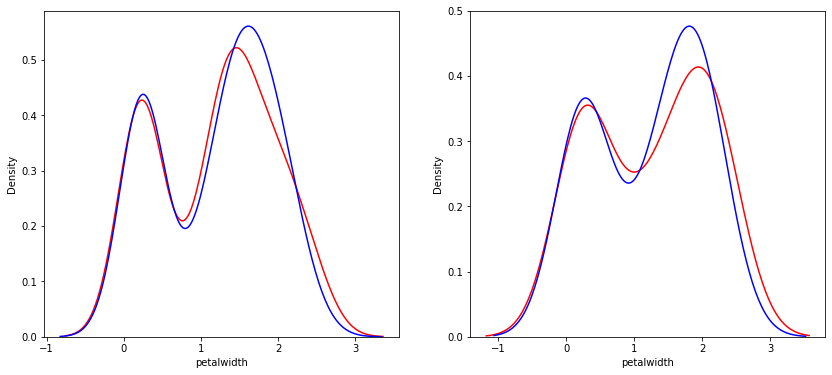

In [18]:
visualDistributionPlot(mlr)

> **Nhận xét**
> * Giữa giá trị thức tế và giá trị dự đoán ở tập train và test chênh nhau nhiều khi `petalwidth` nằm trong khoảng $(1.5, 2.2)$.

###### Task 6

In [31]:
import pandas as pd

X_predict = pd.DataFrame([[4.5, 3.1, 1.6]]) # `sepallength`, `sepalwidth`, `petallength`
y_predict = mlr.predict(X_predict)

y_predict

array([0.36542457])

> **Nhận xét**
> * Với các giá trị như trên thì `petalwidth` có giá trị là $\approx{0.36}$

###### Task 6

In [33]:
from modules.feature_selection import selectKBest

In [36]:
inputs = iris[['sepallength','sepalwidth', 'petallength']]
outputs = iris['petalwidth']

selectKBest(inputs, outputs)

,Feature,Score
2,petallength,1876.657813
0,sepallength,299.194957
1,sepalwidth,21.554378


> **Nhận xét**
> * Thuộc tính `sepalwidth` ko có ảnh hưởng lớn đến tập dữ liệu, tiến hành build lại model với hai thuộc tính `petallength` và `sepallength`

**Tiến hành build lại model bằng hai thuộc tính `petallenght` và `sepallength`**

In [37]:
from modules.regression import MyMultipleLinearRegression

In [38]:
mlr = MyMultipleLinearRegression(iris)
mlr.createTrainTestData(['sepallength', 'petallength'], 'petalwidth', train_size=.8)

In [39]:
mlr.initModel()

In [40]:
y_predict = mlr.predict()
y_predict

array([1.98066832, 0.31067672, 2.45005212, 0.18051455, 1.67148976,
       2.08595597, 0.22754241, 0.21024711, 1.92575073, 0.21965268,
       0.15532951, 1.84413226, 0.29186557, 0.18203039, 1.77040352,
       1.40782322, 1.2900983 , 1.67937949, 2.35902809, 1.89753401,
       2.08747181, 0.20873126, 1.71700178, 0.32008229, 1.28220857,
       1.80013608, 1.41571295, 0.2997553 , 1.59927686, 1.97915247])

In [41]:
mlr.evaluate()

,R^2 all,R^2 train,R^2 test,MSE,MAE
0,0.928732,0.928842,0.928069,0.048613,0.177401


> **Nhận xét**
> * Các điểm số vẫn cao dù ta đã giảm bớt một thuộc tính, nên có thể nói ta có thể tiến hành build một model đủ tốt mà chỉ dựa trên hai thuộc tính này.